In [1]:
# Packages necessary for the project
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Defining the relevant constants
stoptime = 1.7e-10
numpoints = 5000
t0 = np.linspace(0, stoptime, numpoints)
mc2 = 0.511 
F0 = 1e3
alpha = 5e6
c = 3e8
m = mc2 / c**2

In [3]:
# Q19

# reference on how to solve a system of coupled ODEs: 
# https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html
def vectorfield(w, t, p):
    """
    Defines the differential equations for the acceleration of the electron close to c

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z,px,py,pz]
        t :  time
        p :  vector of the parameters:
                  p = [m,alpha,F0,c]
    """
    x, y, z, px, py, pz = w
    m, alpha, F0, c = p
    gamma = np.sqrt(1 + (px**2+py**2+pz**2)/(m**2*c**2))
    # Create f = (x', y', z', px', py', pz'):
    f = [px/(gamma*m),
         py/(gamma*m),
         pz/(gamma*m),
         F0,
         -alpha*y,
         -alpha*z]
    return f

In [4]:
# Initial conditions
# x0,y0,z0: initial positions
# px0,py0,pz0: initial components of the momentum
x0 = 0
y0 = 1e-3
z0 = 0
px0 = 0
py0 = 0
pz0 = 0


# ODE solver parameters
abserr = 1.0e-16
relerr = 1.0e-6
dt = stoptime / numpoints

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m, alpha, F0, c]
w0 = [x0, y0, z0, px0, py0, pz0]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('data2.txt', 'w') as outfile:
    for t1, w1 in zip(t, wsol):
        # could also print f if needed
        outfile.write(', '.join([str(x) for x in [t1, w1[0], w1[1], w1[2], w1[3], w1[4], w1[5]]]) + '\n')

In [5]:
filling_values = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
data = np.genfromtxt('data2.txt', delimiter=', ', filling_values=filling_values) 
t, x, y, z, px, py, pz = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]
p = np.sqrt(px**2 + py**2 + pz**2)
E = np.sqrt(mc2**2 + c**2*p**2)
vx = px * c / np.sqrt(m**2*c**2+px**2)

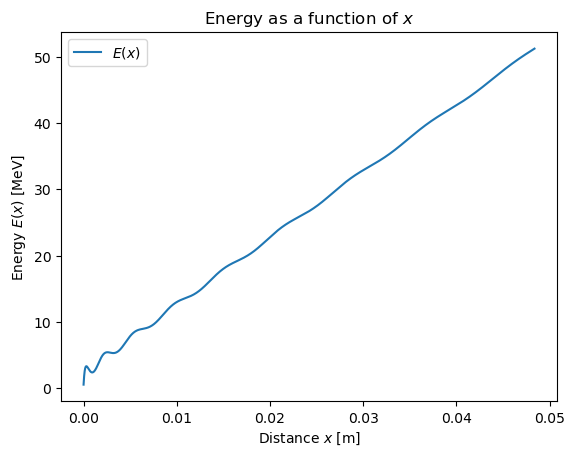

In [6]:
# Q19.2 - E(x)
plt.plot(x, E, label=r'$E(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Energy $E(x)$ [MeV]')
plt.title(r'Energy as a function of $x$')
plt.legend()
plt.show()

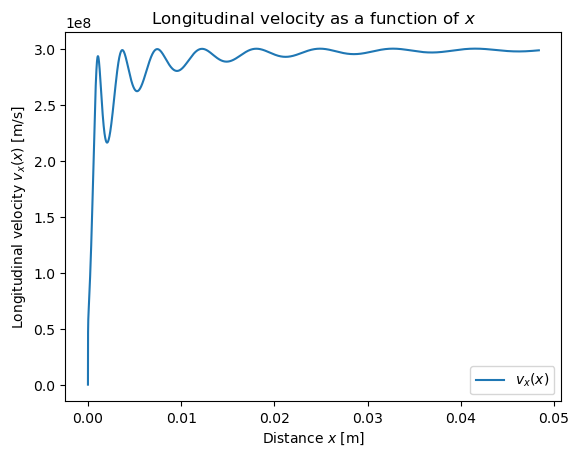

In [7]:
# Q19.2 - v_x(x)
velocity_x = np.diff(np.concatenate(([0], x), axis=0)) / dt

plt.plot(x, velocity_x, label=r'$v_x(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Longitudinal velocity $v_x(x)$ [m/s]')
plt.title(r'Longitudinal velocity as a function of $x$')
plt.legend()
plt.show()

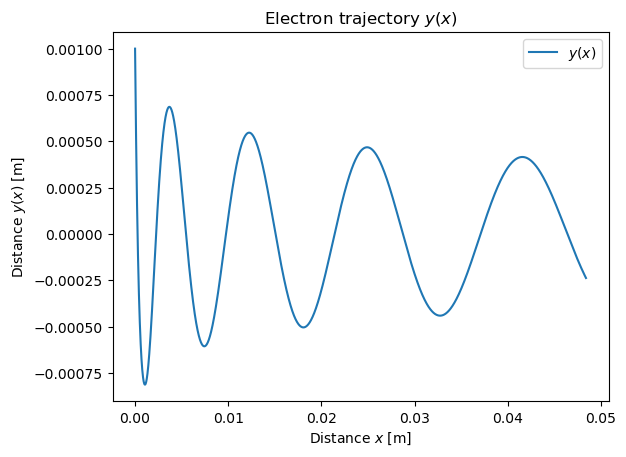

In [9]:
plt.plot(x, y, label=r'$y(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Distance $y(x)$ [m]')
plt.title(r'Electron trajectory $y(x)$')
plt.legend()
plt.show()